100%|██████████| 3.27k/3.27k [00:00<00:00, 4.71MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1
First 5 records of the dataset:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Confusion Matrix:
 [[64  4]
 [ 6 26]]


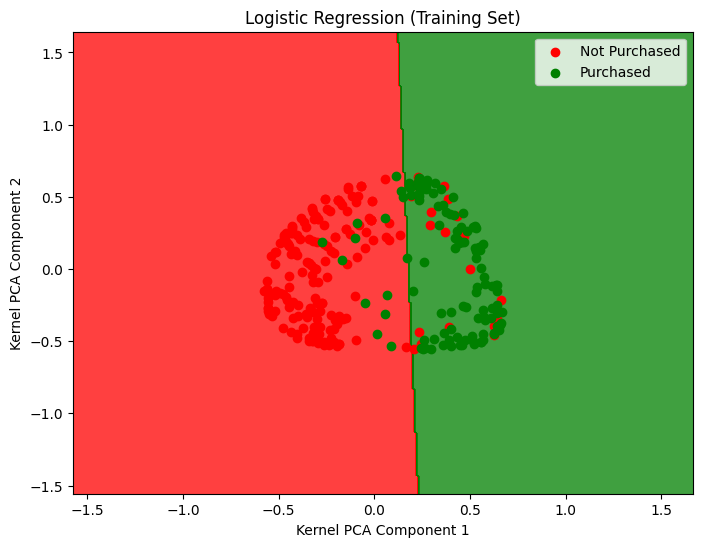

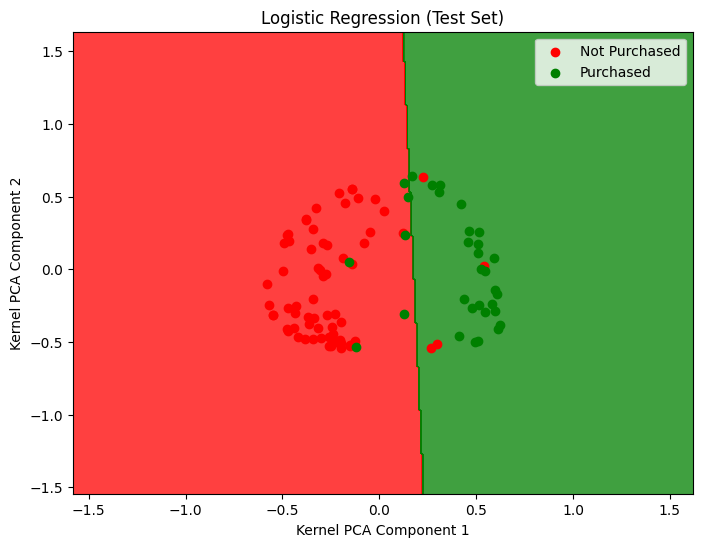

In [2]:
# ---------------------------------------------
# Step 1: Install and Import Required Libraries
# ---------------------------------------------

# If not already installed, run: pip install kagglehub[pandas-datasets]
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# ---------------------------------------------
# Step 2: Download Dataset from Kaggle using KaggleHub
# ---------------------------------------------

# Download the dataset "Social Network Ads" from KaggleHub
dataset_path = kagglehub.dataset_download("akram24/social-network-ads")
print("Dataset downloaded to:", dataset_path)

# Load the CSV file into a pandas DataFrame
data_file = f"{dataset_path}/Social_Network_Ads.csv"
dataset = pd.read_csv(data_file)

# Display the first 5 rows to verify
print("First 5 records of the dataset:\n", dataset.head())

# ---------------------------------------------
# Step 3: Extract Features and Target Variable
# ---------------------------------------------

# Selecting only the features: Age (index 2) and Estimated Salary (index 3)
X = dataset.iloc[:, [2, 3]].values

# Selecting the target variable: Purchased (index 4)
y = dataset.iloc[:, 4].values

# ---------------------------------------------
# Step 4: Split Dataset into Training and Test Sets
# ---------------------------------------------

# Split the data: 75% training, 25% testing, random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ---------------------------------------------
# Step 5: Feature Scaling
# ---------------------------------------------

# Standardize the features to mean=0 and std=1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ---------------------------------------------
# Step 6: Apply Kernel PCA for Non-linear Dimensionality Reduction
# ---------------------------------------------

# Reduce to 2 principal components using RBF kernel for better separability
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# ---------------------------------------------
# Step 7: Fit Logistic Regression Model
# ---------------------------------------------

# Train logistic regression on the transformed training data
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# ---------------------------------------------
# Step 8: Predict on Test Set and Evaluate
# ---------------------------------------------

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Generate a confusion matrix to evaluate performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ---------------------------------------------
# Step 9: Visualize Training Set Results
# ---------------------------------------------

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='red', label='Not Purchased')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='green', label='Purchased')
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.legend()
plt.show()

# ---------------------------------------------
# Step 10: Visualize Test Set Results
# ---------------------------------------------

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='red', label='Not Purchased')
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='green', label='Purchased')
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.legend()
plt.show()
